<a href="https://colab.research.google.com/github/CarlosAg20/cd-Carlos-Agudelo-2023/blob/main/HHEATMAP_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyproj

In [ ]:
!pip install geopandas

In [ ]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.5
Uninstalling Cython-3.0.5:
  Successfully uninstalled Cython-3.0.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.7 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.2
Uninstalling shapely-2.0.2:
  Successfully uninstalled shapely-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.2-cp310-cp310-linux_x86_64.whl size=1027136 sha256=4876a5d91e71477b5575bfe325702d1cd72456573d87ac30e95ddbc48734f729
  Stored in directory: /root/.cache/pip/wheels/1f/6b/52/14cb4558cddc0fd89de08f0e1fd08f816f4f3e1969311377c6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
li

In [ ]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


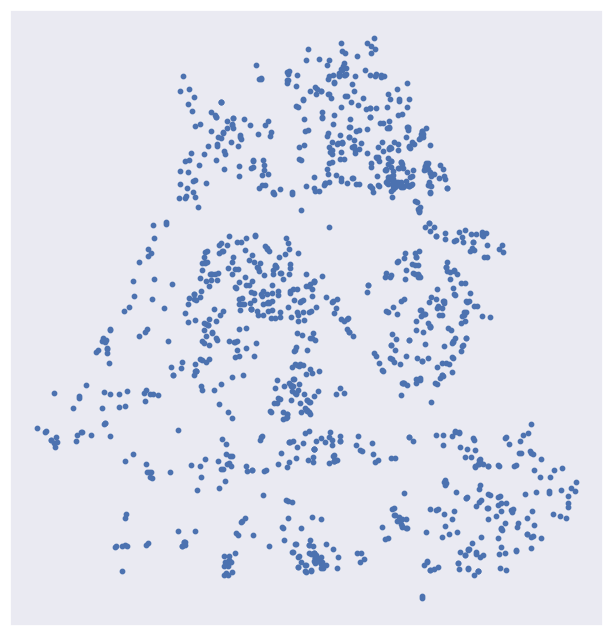

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [ ]:
#Se carga la cartografía de Floridablanca/Melbourne
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

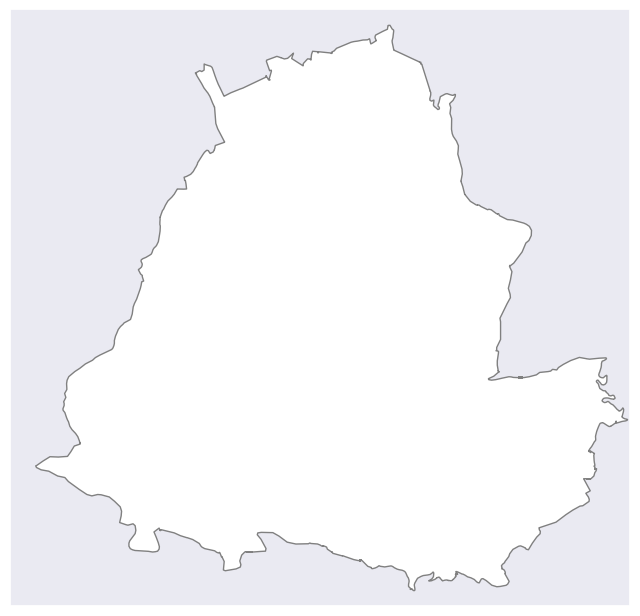

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

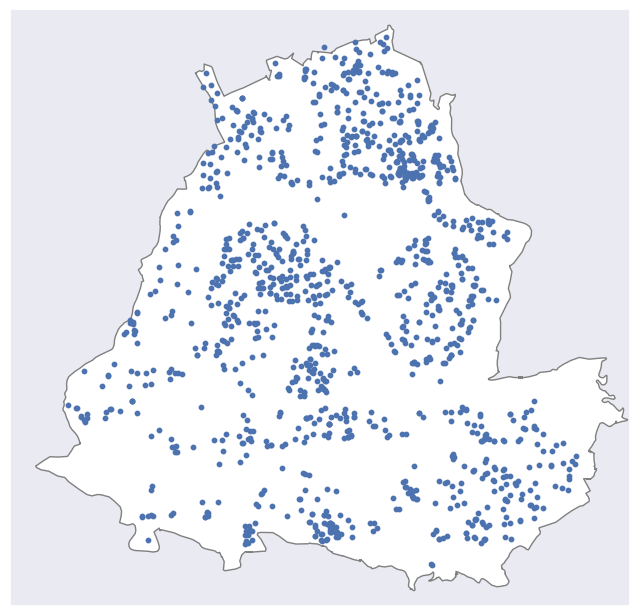

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [ ]:


import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Carga el archivo shapefile en un GeoDataFrame
gdf = gpd.read_file('68276_urbano.shp')

# Define el cuadro delimitador
bbox = box(lower_lon, lower_lat, upper_lon, upper_lat)

# Intersecta el GeoDataFrame con el cuadro delimitador
intersected = gdf[gdf.intersects(bbox)]

# Re-proyecta las geometrías a una proyección UTM (por ejemplo, UTM Zone 18N para Colombia)
utm_zone = 18  # Puedes ajustar la zona UTM según tu ubicación
utm_crs = f"+proj=utm +zone={utm_zone} +datum=WGS84 +units=m +no_defs"
intersected = intersected.to_crs(utm_crs)

# Calcula el área total de las geometrías re-proyectadas
total_area = intersected.geometry.area.sum()


# Imprime el área total
print(f'Área total de la región de interés: {total_area} metros cuadrados')


Área total de la región de interés: 14180920.862356503 metros cuadrados


In [ ]:
from shapely.geometry import box
from scipy.spatial import distance
import numpy as np


In [ ]:
def dist_puntos(p1, p2):

    return ((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**0.5


point_coordinates = list(zip(df['x'], df['y']))

def ripley_k(point_coords, max_distance, area):
    num_points = len(point_coords)

    counter = 0
    for i in range(num_points):
      for j in range(i+1, num_points):
          distancia = dist_puntos(point_coords[i], point_coords[j])
          if distancia <= max_distance:
              counter = counter+1

    KR = area*counter/(num_points**2)
    return KR

max_distance = 20
ripley_values = ripley_k(point_coordinates, max_distance, total_area)
print(ripley_values)
for max_distance in range(20, 201, 20):
        ripley_value = ripley_k(point_coordinates, max_distance, total_area)

        print(f'Dataset real, Distancia Máxima {max_distance}m: {ripley_value}')

#print(point_coordinates)

3632.836787029275
Dataset real, Distancia Máxima 20m: 3632.836787029275
Dataset real, Distancia Máxima 40m: 8610.1793457287
Dataset real, Distancia Máxima 60m: 16160.781295240526
Dataset real, Distancia Máxima 80m: 25376.43343880744
Dataset real, Distancia Máxima 100m: 35420.158673535436
Dataset real, Distancia Máxima 120m: 47155.64613751726
Dataset real, Distancia Máxima 140m: 60956.86432353534
Dataset real, Distancia Máxima 160m: 76351.9006097452
Dataset real, Distancia Máxima 180m: 91809.26497808544
Dataset real, Distancia Máxima 200m: 109127.5677986049


In [ ]:
pip install shapely


In [ ]:
import random
from shapely.geometry import Point, Polygon


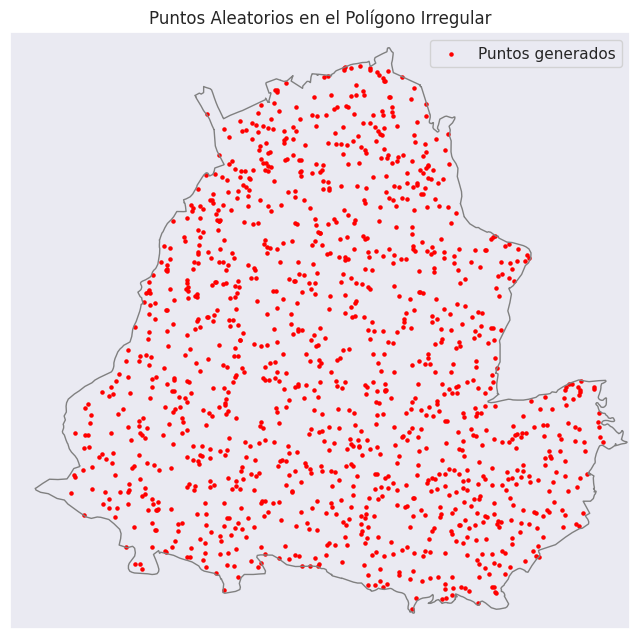

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)



# Establecer los límites de la gráfica
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

gdf = gpd.read_file('68276_urbano.shp')
# Dibujar el polígono irregular
ax.add_geometries(gdf['geometry'], ccrs.PlateCarree(), facecolor='none', edgecolor='gray')

# Generar 1200 puntos aleatorios
puntos_generados = []
while len(puntos_generados) < len(point_coordinates):
    lon = random.uniform(lower_lon, upper_lon)
    lat = random.uniform(lower_lat, upper_lat)
    punto = Point(lon, lat)
    if punto.within(gdf['geometry'].iloc[0]):
        puntos_generados.append(punto)

coordenadas_x = [p.x for p in puntos_generados]
coordenadas_y = [p.y for p in puntos_generados]


plt.scatter(coordenadas_x, coordenadas_y, color='red', s=5, label='Puntos generados')
plt.legend()
plt.title('Puntos Aleatorios en el Polígono Irregular')
plt.show()

In [ ]:
x_min, x_max, y_min, y_max = 487311, 497510, 453234, 473201
cell_size = 10


ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


(453234.0, 473201.0)

In [ ]:
from PIL import Image

In [ ]:
from PIL import Image

# Tamaño de la imagen
width, height = 200, 25

# Crear una nueva imagen
img = Image.new('RGB', (width, height))

# Crear 10 franjas con tonalidades diferentes de rojo
for i in range(10):
    left = i * (width // 10)  # Calcular la posición izquierda de la franja
    right = (i + 1) * (width // 10)  # Calcular la posición derecha de la franja
    color = (255, i * 25, 0)  # Tonalidad de rojo (R, G, B)
    for x in range(left, right):
        for y in range(height):
            img.putpixel((x, y), color)

# Guardar la imagen
img.save('stripes.png')

# Mostrar la imagen
display(img)

In [ ]:
def distancia(x1,y1,x2,y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [ ]:
resolucion = 10

X_max = df['x'].max()
X_min = df['x'].min()
dim_X = math.ceil((X_max - X_min)/resolucion)

Y_max = df['y'].max()
Y_min = df['y'].min()
dim_Y = math.ceil((Y_max - Y_min)/resolucion)

print("El tamaño de la matriz es de: Columnas: ", dim_X, " y Filas: ", dim_Y)

El tamaño de la matriz es de: Columnas:  438  y Filas:  455


In [ ]:
matriz = np.zeros((dim_X,dim_Y))
print(matriz)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def distancia_p(valor, min, res):
  distancia = (valor - min)/res
  return distancia


p1x = 0
p1y = 0
for i in range(len(df['x'])):
  p1x = df['x'].iloc[i]
  p1y = df['y'].iloc[i]
  fila_x = int(np.floor(distancia_p(p1x, X_min, resolucion)))
  fila_y = int(np.floor(distancia_p(p1y, Y_min, resolucion)))

  matriz[fila_x,fila_y] += 1

print(matriz)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
matriz_ceros = matriz

In [ ]:
radio_circulo = 100
n_resolucion = math.ceil(radio_circulo/resolucion)

matriz_densidad =np.zeros((dim_Y,dim_X))

In [ ]:
for i in range(dim_Y):
    Y_inicial, Y_final = np.clip([i - n_resolucion, i + n_resolucion], 0, dim_Y - 1)
    for j in range(dim_X):
        X_inicial, X_final = np.clip([j - n_resolucion, j + n_resolucion], 0, dim_X - 1)
        suma = 0
        for k in range(Y_inicial, Y_final + 1):
            for l in range(X_inicial, X_final + 1):
                d_centro = distancia(i, j, k, l)
                if (d_centro <= n_resolucion):
                    suma += matriz_ceros[l][k]

        matriz_densidad[i][j] = suma

In [ ]:
def kernel (tipo,distancia,radio):
  resultado = 0
  match tipo:
    case 1:
        resultado = 1
    case 2:
        resultado = 1 - (distancia/radio)
    case 3:
        resultado = math.exp(- (distancia**2/ (2*radio**2)))
    case 4:
        resultado = 1 - (distancia**2 / radio**2)
    case 5:
        resultado = math.exp(- (distancia/radio))
    case 6:
        resultado = math.cos((math.pi*distancia) / (2*radio))
    case _:
        print("Error, por favor utiliza de tipo 1 a 6.")
  return resultado

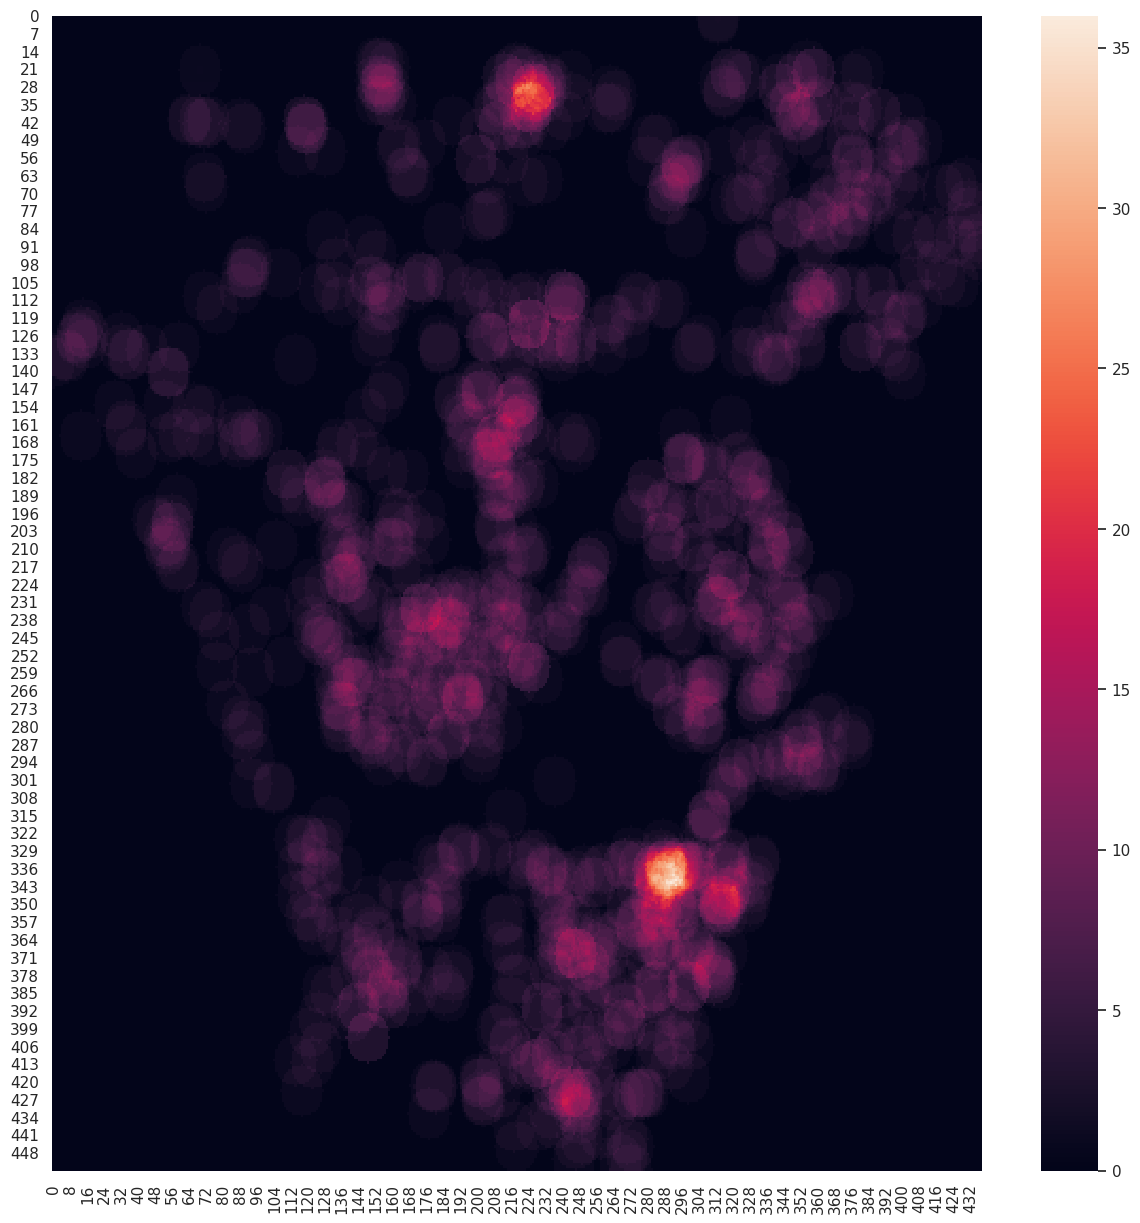

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(matriz_densidad)

In [ ]:
import numpy as np

valores_no_cero = matriz_densidad[matriz_densidad != 0]
max_valor = np.max(valores_no_cero)
min_valor = np.min(valores_no_cero)

rango = max_valor - min_valor
cantidad_franjas = 10
valor_por_franja = rango / cantidad_franjas

print("Valor Máximo:", max_valor)
print("Valor Mínimo:", min_valor)
print("Rango:", rango)
print("Valor por Franja:", valor_por_franja)

Valor Máximo: 36.0
Valor Mínimo: 0.9048374180359595
Rango: 35.09516258196404
Valor por Franja: 3.509516258196404


In [ ]:
import colorsys

def rgb_a_hsv(r, g, b):
  (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
  return (h, s, v)

def hsv_a_rgb(h, s, v):
  (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
  r = int(r)
  g = int(g)
  b = int(b)
  return (r, g, b)

In [ ]:
from PIL import Image, ImageDraw

def pintar_color(r, g, b):
  img = Image.new('RGB', (300, 25))
  draw = ImageDraw.Draw(img)
  draw.rectangle([(0, 0), img.size], fill = (r,g,b))
  display(img)

r_ini = 255
g_ini = 0
b_ini = 0
hsv_ini = rgb_a_hsv(r_ini, g_ini, b_ini)

r_fin = 255
g_fin = 233
b_fin = 0
hsv_fin = rgb_a_hsv(r_fin, g_fin, b_fin)

n = 10

for i in range(n):
  h = hsv_ini[0] + i * (hsv_fin[0] - hsv_ini[0]) / (n - 1)
  s = hsv_ini[1] + i * (hsv_fin[1] - hsv_ini[1]) / (n - 1)
  v = hsv_ini[2] + i * (hsv_fin[2] - hsv_ini[2]) / (n - 1)

  (r, g, b) = hsv_a_rgb(h, s, v)
  pintar_color(r, g, b)

In [ ]:
def gama_colores(color_ini, color_fin, n_colores):
  t_ini = rgb_a_hsv(color_ini[0], color_ini[1], color_ini[2])
  h_ini = t_ini[0]
  s_ini = t_ini[1]
  v_ini = t_ini[2]

  t_fin = rgb_a_hsv(color_fin[0], color_fin[1], color_fin[2])
  h_fin = t_fin[0]
  s_fin = t_fin[1]
  v_fin = t_fin[2]

  lista_colores = []
  for i in range(n_colores):
    h = h_ini + (i * (h_fin - h_ini) / (n - 1))
    s = s_ini + (i * (s_fin - s_ini) / (n - 1))
    v = v_ini + (i * (v_fin - v_ini) / (n - 1))
    t_rgb = hsv_a_rgb(h, s, v)
    lista_colores.append((t_rgb[0], t_rgb[1], t_rgb[2]))

  return lista_colores

In [ ]:
lista_colores = gama_colores((255,233,0), (255,0,0), 10)
print(lista_colores)

[(255, 232, 0), (255, 207, 0), (255, 181, 0), (255, 155, 0), (255, 129, 0), (255, 103, 0), (255, 77, 0), (255, 51, 0), (255, 25, 0), (255, 0, 0)]


In [ ]:
from PIL import Image
import numpy as np

pixels = [
   [(54, 54, 54), (232, 23, 93), (71, 71, 71), (168, 167, 167)],
   [(204, 82, 122), (54, 54, 54), (168, 167, 167), (232, 23, 93)],
   [(71, 71, 71), (168, 167, 167), (54, 54, 54), (204, 82, 122)],
   [(168, 167, 167), (204, 82, 122), (232, 23, 93), (54, 54, 54)]
]

array = np.array(pixels, dtype=np.uint8)
new_image = Image.fromarray(array)
display(new_image)

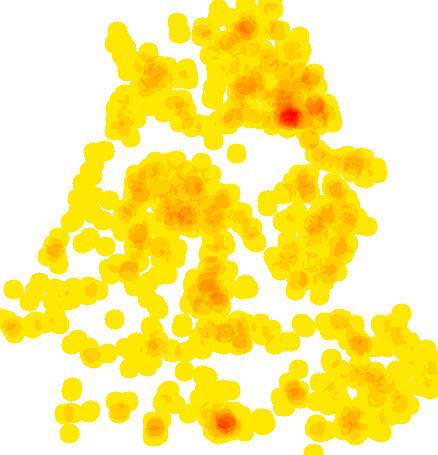

In [ ]:
matriz_colores = []
for i in range(dim_Y):
    matriz_colores.append([0] * dim_X)

for i in range(dim_Y):
    for j in range(dim_X):
        if matriz_densidad[i][j] == 0:
            matriz_colores[i][j] = (255, 255, 255)
        else:
            indice = math.floor((matriz_densidad[i][j] - min_valor) / valor_por_franja)
            if indice >= 10:
                indice -= 1
            matriz_colores[i][j] = lista_colores[indice]

array = np.array(matriz_colores, dtype=np.uint8)
new_image = Image.fromarray(array)
new_image = new_image.transpose(Image.FLIP_TOP_BOTTOM)

display(new_image)